In [29]:
import os
import pickle
from torchvision.datasets import ImageNet
import numpy as np

In [8]:
import numpy as np
from scipy.special import logsumexp
logsumexp(-13)
a = np.array([-13.1])
np.finfo(a.dtype)

finfo(resolution=1e-15, min=-1.7976931348623157e+308, max=1.7976931348623157e+308, dtype=float64)

In [10]:
np.concatenate([np.array([[-13]])], axis=1)

array([[-13]])

In [30]:
import config
from einsum import Graph
from einsum import EinsumNetwork

def init_spn(device):
    """
        Build a SPN (implemented as an einsum network). The structure is either
        the same as proposed in https://arxiv.org/pdf/1202.3732.pdf (referred to as
        poon-domingos) or a binary tree.

        In case of poon-domingos the image is split into smaller hypercubes (i.e. a set of
        neighbored pixels) where each pixel is a random variable. These hypercubes are split further
        until we operate on pixel-level. The spplitting is done randomly. For more information
        refer to the link above.
    """

    if config.structure == 'poon-domingos':
        pd_delta = [[config.height / d, config.width / d] for d in config.pd_num_pieces]
        graph = Graph.poon_domingos_structure(shape=(112, 112), delta=[4], axes=[1])
    elif config.structure == 'binary-trees':
        graph = Graph.random_binary_trees(num_var=config.num_vars, depth=config.depth, num_repetitions=config.num_repetitions)
    elif config.structure == 'flat-binary-tree':
        graph = Graph.binary_tree_spn(shape=(config.height, config.width))
    else:
        raise AssertionError("Unknown Structure")
    
    K = 12

    args = EinsumNetwork.Args(
            num_var=112*112,
            num_dims=config.num_dims,
            num_classes=1,
            num_sums=K,
            num_input_distributions=K,
            exponential_family=config.exponential_family,
            exponential_family_args=config.exponential_family_args,
            online_em_frequency=config.online_em_frequency,
            online_em_stepsize=config.online_em_stepsize)

    einet = EinsumNetwork.EinsumNetwork(graph, args)
    einet.initialize()
    einet.to(device)
    return einet

spn = init_spn('cuda:3')
params = list(spn.parameters())
num_params = sum(p.element_size()*p.nelement() for p in params)
print(num_params / 1024**2)

{0}
27.533489227294922


In [4]:
if os.path.isfile(f'./precomputed/clusters/cluster_0'):
    means, idx, ds_idx = pickle.load(open(f'./precomputed/clusters/cluster_0', 'rb'))
means, idx, ds_idx

(array([[208.93034 , 218.0697  , 226.49318 , ..., 217.17418 , 223.5839  ,
         228.00197 ],
        [ 49.999992,  50.999992,  40.      , ..., 142.      ,  81.      ,
          37.      ],
        [ 35.883533,  35.47068 ,  30.239319, ...,  52.82904 ,  49.8979  ,
          42.83312 ],
        ...,
        [160.08353 , 155.8889  , 143.85452 , ..., 198.60352 , 193.58246 ,
         182.00687 ],
        [230.19077 , 230.10078 , 228.7467  , ..., 236.53772 , 236.90504 ,
         235.9668  ],
        [128.6216  , 101.302605,  73.81777 , ..., 111.11525 ,  83.40771 ,
          59.050957]], dtype=float32),
 array([14, 70, 28, ..., 87, 24, 11], dtype=int32),
 array([1102236,  184164, 1113531, ...,  146807, 1039197,   90770]))

In [5]:
data = ImageNet('../../../../datasets/imagenet/', split='train')

In [12]:
cluster = 14
cluster_idx = np.argwhere(idx == cluster).flatten()
train_idx = ds_idx[cluster_idx]

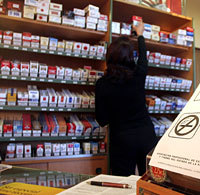

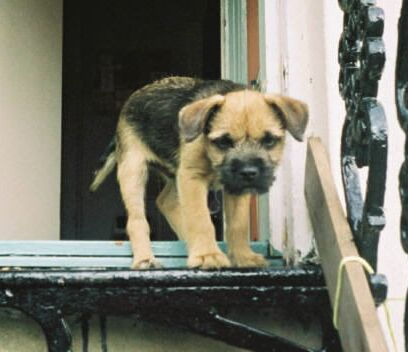

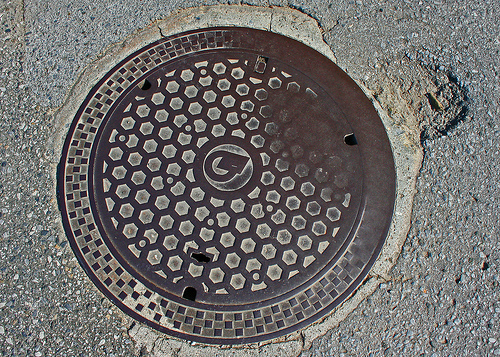

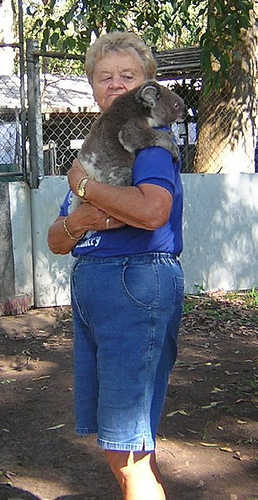

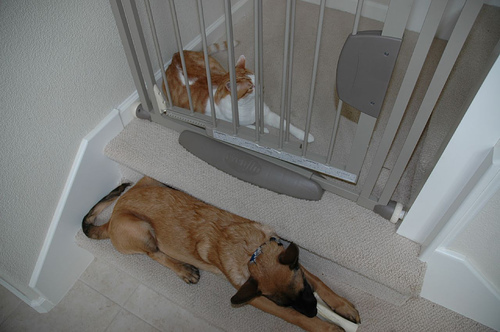

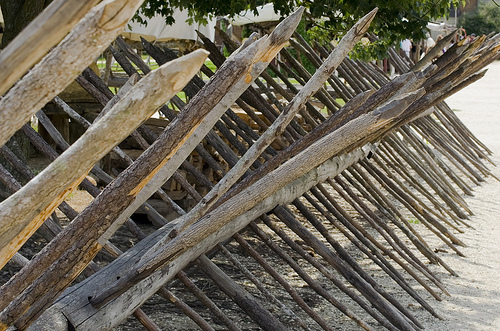

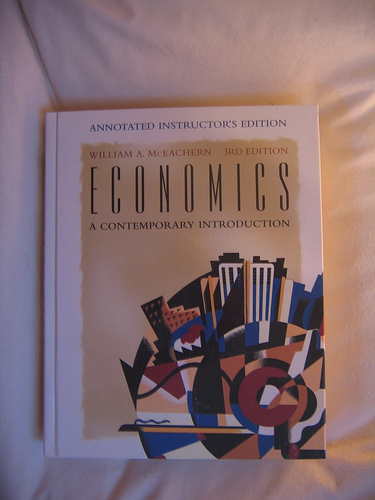

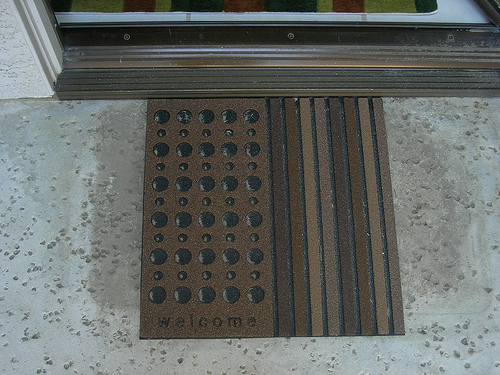

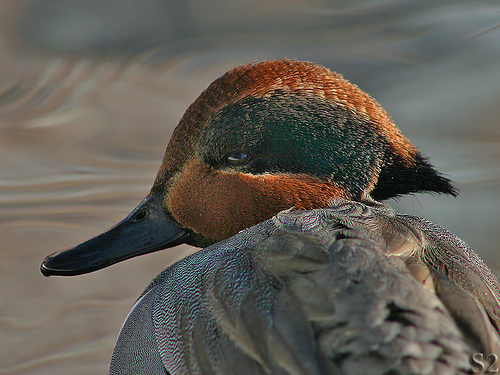

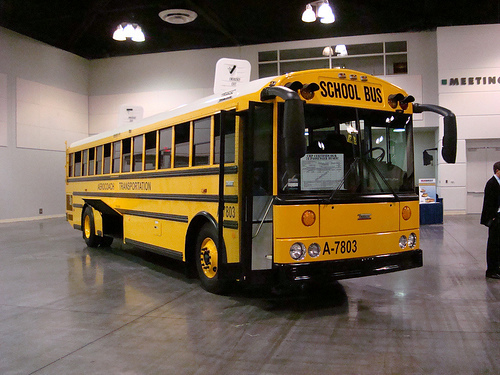

In [17]:
for i in range(10):
    j = train_idx[i]
    img = data[j]
    img[0].show()